<a href="https://colab.research.google.com/github/davidmduraesocial-hash/ia-grafos-David-Martins-Dur-es/blob/main/ia_grafos_David_Martins_Duraes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lista de Exercícios N2 - Grafos e Algoritmos de Busca**

Nome: [DAVID MARTINS DURÃES]

Turma: [ENGCO221N01]

GitHub: [https://github.com/davidmduraesocial-hash/ia-grafos-David-Martins-Dur-es.git]

**Parte A — Algoritmo de Dijkstra**

**Implementação do Algoritmo de Dijkstra**

In [ ]:
import heapq
from collections import defaultdict

def dijkstra(graph, start):

    # Inicialização
    dist = {node: float('inf') for node in graph}
    parent = {node: None for node in graph}
    dist[start] = 0

    # Fila de prioridade
    pq = [(0, start)]

    while pq:
        current_dist, current_node = heapq.heappop(pq)

        # Se encontramos um caminho melhor antes, ignoramos
        if current_dist > dist[current_node]:
            continue

        # Explora vizinhos
        for neighbor, weight in graph[current_node]:
            distance = current_dist + weight

            # Relaxamento
            if distance < dist[neighbor]:
                dist[neighbor] = distance
                parent[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    return dist, parent

def reconstruct_path(parent, target):

    path = []
    current = target

    while current is not None:
        path.append(current)
        current = parent[current]

    return path[::-1]  # Inverte para começar do início

#(sistema de navegação para ambulâncias)
graph = {
    'Hospital': [('A', 5), ('B', 2)],
    'A': [('Hospital', 5), ('C', 3), ('D', 7)],
    'B': [('Hospital', 2), ('C', 1), ('E', 4)],
    'C': [('A', 3), ('B', 1), ('D', 2), ('E', 3)],
    'D': [('A', 7), ('C', 2), ('Destino', 6)],
    'E': [('B', 4), ('C', 3), ('Destino', 2)],
    'Destino': [('D', 6), ('E', 2)]
}

# Executa Dijkstra
start = 'Hospital'
target = 'Destino'
distances, predecessors = dijkstra(graph, start)
path = reconstruct_path(predecessors, target)

print(f"Distância mínima: {distances[target]} minutos")
print(f"Caminho: {' → '.join(path)}")

# Verificação manual
print("\nDistâncias mínimas de", start)
for node, dist in distances.items():
    print(f"{node}: {dist} minutos")

Distância mínima: 8 minutos
Caminho: Hospital → B → E → Destino

Distâncias mínimas de Hospital
Hospital: 0 minutos
A: 5 minutos
B: 2 minutos
C: 3 minutos
D: 5 minutos
E: 6 minutos
Destino: 8 minutos


**1. Por que Dijkstra exige arestas não negativas?**

O algoritmo de Dijkstra funciona sob o princípio de que uma vez que um nó é marcado como visitado, sua distância mínima já foi encontrada. Com pesos negativos, este princípio é violado porque um caminho mais longo poderia se tornar mais curto ao passar por uma aresta negativa posteriormente. Isso faria com que o algoritmo não garantisse a corretude do resultado.

**2. Qual a complexidade do algoritmo com lista de adjacência e heapq?**

A complexidade é O((V + E) log V), onde:

· V é o número de vértices

· E é o número de arestas


Cada vértice é inserido/removido da heap (O(log V)) e cada aresta é processada uma vez, com isso o heap binária, as operações de inserção e remoção são logarítmicas.

**Parte B — Algoritmo A**

**Implementação do Algoritmo A**

Grid gerado (0 = livre, 1 = obstáculo):
[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1]
 [0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

Caminho encontrado! Custo: 38
Comprimento do caminho: 39


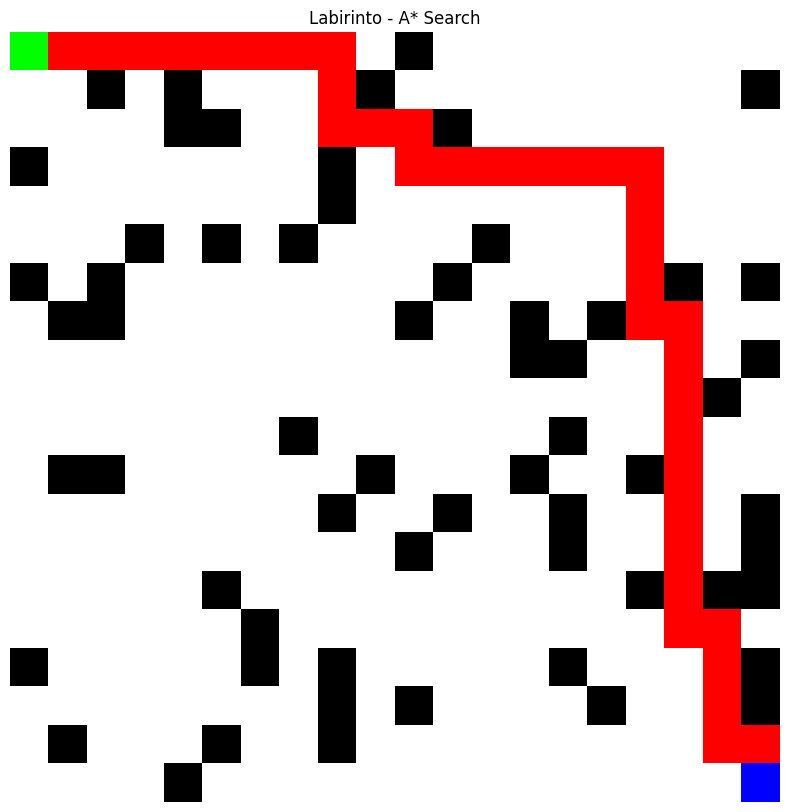

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappush, heappop

def generate_grid(size=20, obstacle_prob=0.15):

    grid = np.random.choice([0, 1], size=(size, size), p=[1-obstacle_prob, obstacle_prob])

    # Garante que início e destino são livres
    grid[0, 0] = 0
    grid[-1, -1] = 0

    return grid

def manhattan_distance(a, b):

    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, goal, heuristic):

    rows, cols = grid.shape

    # Verifica se início e destino são válidos
    if grid[start] == 1 or grid[goal] == 1:
        return None, float('inf')

    # Estruturas de dados
    open_set = []
    heappush(open_set, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    # Movimentos possíveis (4 direções)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    while open_set:
        _, current = heappop(open_set)

        if current == goal:
            # Reconstrói o caminho
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], g_score[goal]

        # Explora vizinhos
        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)

            # Verifica limites e obstáculos
            if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and
                grid[neighbor] == 0):

                tentative_g = g_score[current] + 1

                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                    heappush(open_set, (f_score[neighbor], neighbor))

    return None, float('inf')  # Caminho não encontrado

def visualize_grid(grid, path=None):

    plt.figure(figsize=(10, 10))

    # Cria matriz de visualização
    visual_grid = np.zeros((grid.shape[0], grid.shape[1], 3))

    # Obstáculos em preto
    visual_grid[grid == 1] = [0, 0, 0]
    # Caminho livre em branco
    visual_grid[grid == 0] = [1, 1, 1]

    if path:
        # Caminho em vermelho
        for pos in path:
            visual_grid[pos] = [1, 0, 0]

    # Início em verde, destino em azul
    if path:
        visual_grid[path[0]] = [0, 1, 0]  # Verde
        visual_grid[path[-1]] = [0, 0, 1]  # Azul

    plt.imshow(visual_grid)
    plt.title("Labirinto - A* Search")
    plt.axis('off')
    plt.show()

    # Gera e testa o grid
grid = generate_grid(20, 0.15)
start = (0, 0)
goal = (19, 19)

print("Grid gerado (0 = livre, 1 = obstáculo):")
print(grid)

# Executa A*
path, cost = a_star(grid, start, goal, manhattan_distance)

if path:
    print(f"\nCaminho encontrado! Custo: {cost}")
    print(f"Comprimento do caminho: {len(path)}")
    visualize_grid(grid, path)
else:
    print("\nNão foi possível encontrar um caminho!")
    visualize_grid(grid)

**Questões Discursivas - Parte B**

**1. A vs Dijkstra: qual expande menos nós?**

O A geralmente expande menos nós que o Dijkstra porque usa uma heurística para guiar a busca em direção ao objetivo, enquanto o Dijkstra explora igualmente em todas as direções, o A prioriza nós que parecem estar mais próximos do destino, tornando-o mais eficiente em problemas onde uma boa heurística está disponível.

**2. Por que a heurística Manhattan é admissível nesse caso?**

A distância Manhattan é admissível neste contexto porque em um grid com movimentação nas 4 direções (cima, baixo, esquerda, direita), ela nunca superestima o custo real. O custo mínimo entre dois pontos em tal grid é exatamente a distância Manhattan, já que cada movimento tem custo 1 e não é possível cortar caminho na diagonal.

**Parte C — Árvores Binárias e Percursos**

**Implementação da BST e Percursos**

In [ ]:
class Node:
    #Nó de uma árvore binária
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BST:
    #Árvore Binária de Busca
    def __init__(self):
        self.root = None

    def insert(self, value):
        #Insere um valor na BST
        if self.root is None:
            self.root = Node(value)
        else:
            self._insert_recursive(self.root, value)

    def _insert_recursive(self, node, value):
        if value < node.value:
            if node.left is None:
                node.left = Node(value)
            else:
                self._insert_recursive(node.left, value)
        else:
            if node.right is None:
                node.right = Node(value)
            else:
                self._insert_recursive(node.right, value)

def in_order(node, result=None):
    #Percurso em ordem: esquerda → raiz → direita
    if result is None:
        result = []

    if node:
        in_order(node.left, result)
        result.append(node.value)
        in_order(node.right, result)

    return result

def pre_order(node, result=None):
    #Percurso pré-ordem: raiz → esquerda → direita
    if result is None:
        result = []

    if node:
        result.append(node.value)
        pre_order(node.left, result)
        pre_order(node.right, result)

    return result

def post_order(node, result=None):
    #Percurso pós-ordem: esquerda → direita → raiz
    if result is None:
        result = []

    if node:
        post_order(node.left, result)
        post_order(node.right, result)
        result.append(node.value)

    return result

    # Cria a BST com os valores fornecidos
values = [50, 30, 70, 20, 40, 60, 80, 35, 45]
bst = BST()

for value in values:
    bst.insert(value)

# Executa os percursos
print("Valores inseridos:", values)
print("\nPercurso Em-Ordem:", in_order(bst.root))
print("Percurso Pré-Ordem:", pre_order(bst.root))
print("Percurso Pós-Ordem:", post_order(bst.root))

# Verificação esperada
print("\n--- Verificação ---")
print("Em-ordem esperado: [20, 30, 35, 40, 45, 50, 60, 70, 80]")
print("Pré-ordem esperado: [50, 30, 20, 40, 35, 45, 70, 60, 80]")
print("Pós-ordem esperado: [20, 35, 45, 40, 30, 60, 80, 70, 50]")



Valores inseridos: [50, 30, 70, 20, 40, 60, 80, 35, 45]

Percurso Em-Ordem: [20, 30, 35, 40, 45, 50, 60, 70, 80]
Percurso Pré-Ordem: [50, 30, 20, 40, 35, 45, 70, 60, 80]
Percurso Pós-Ordem: [20, 35, 45, 40, 30, 60, 80, 70, 50]

--- Verificação ---
Em-ordem esperado: [20, 30, 35, 40, 45, 50, 60, 70, 80]
Pré-ordem esperado: [50, 30, 20, 40, 35, 45, 70, 60, 80]
Pós-ordem esperado: [20, 35, 45, 40, 30, 60, 80, 70, 50]


**Questões Discursivas - Parte C**

**1. Em que situação cada tipo de percurso é mais indicado?**

· Em-ordem: Ideal para obter elementos em ordem crescente em BSTs, útil para relatórios ordenados, estatísticas ou quando se precisa processar dados de forma sequencial.

· Pré-ordem: Útil para copiar/reconstruir árvores, serialização, ou quando se precisa processar a raiz antes das subárvores (como em expressões matemáticas).

· Pós-ordem: Adequado para operações que requerem processar filhos antes dos pais, como liberação de memória, cálculo de totais acumulados, ou avaliação de expressões pós-fixadas.

**Parte D — Reflexões**

**1. Quando não é vantajoso usar A, mesmo tendo uma heurística?**

O A pode não ser vantajoso quando:

(1) o espaço de busca é muito pequeno e o overhead da heurística supera o benefício;

(2) a heurística é computacionalmente cara;

(3) em ambientes dinâmicos onde o custo das arestas muda frequentemente;

(4) quando a memória é limitada, pois o A* mantém mais informações que algoritmos mais simples;

(5) em problemas onde a qualidade da solução não precisa ser ótima, podendo-se usar algoritmos mais rápidos como Best-First Search.

**2. Diferencie corretude e otimalidade nos algoritmos estudados.**

Corretude refere-se à capacidade do algoritmo sempre encontrar uma solução quando ela existe (terminação) e nunca retornar uma solução incorreta. Optimalidade significa que o algoritmo sempre encontra a melhor solução possível (menor custo). Dijkstra e A são ambos corretos e ótimos para grafos com pesos não-negativos. Um algoritmo pode ser correto mas não ótimo (como Best-First Search com heurística), mas não pode ser ótimo sem ser correto.

**3. Dê um exemplo do mundo real onde cada tipo de percurso (em, pré, pós) é essencial.**

· Em-ordem: Sistema de recomendação de produtos por preço - ao percorrer uma BST de produtos ordenada por preço em-ordem, obtemos produtos do mais barato ao mais caro naturalmente.
· Pré-ordem: Clone de estrutura organizacional - ao copiar uma hierarquia de departamentos de empresa, precisamos criar o nó pai (gerente) antes dos filhos (subordinados).
· Pós-ordem: Cálculo de orçamento em projetos - para calcular o custo total de um projeto, precisamos somar primeiro os custos das sub-tarefas antes do projeto principal.

**4. Como heurísticas inconsistentes podem afetar o resultado do A ?**

Heurísticas inconsistentes (que violam a desigualdade triangular) podem fazer com que o A* reexpanda nós, aumentando significativamente o tempo de execução. Embora o A* ainda retorne o caminho ótimo com heurísticas admissíveis mas inconsistentes, a eficiência é comprometida. Em casos extremos, o comportamento pode se aproximar do Dijkstra. Heurísticas consistentes garantem que cada nó seja expandido apenas uma vez, otimizando a performance.